<a href="https://colab.research.google.com/github/TeaWithLucas/MLBirds/blob/main/dataset%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import cv2
import numpy as np
import re
import seaborn as sns
import operator
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
    from imageio import imread, imwrite
from PIL import Image

In [2]:
git_fldr = '/content/MLBirds/'

if os.path.exists(git_fldr):
  %cd '/content/MLBirds/'
  !git pull
else:
  !git clone https://github.com/TeaWithLucas/MLBirds.git
  %cd '/content/MLBirds/'

import data_load as data

Cloning into 'MLBirds'...
remote: Enumerating objects: 24143, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 24143 (delta 20), reused 33 (delta 12), pack-reused 24102
Receiving objects: 100% (24143/24143), 1.14 GiB | 35.67 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Checking out files: 100% (23611/23611), done.
/content/MLBirds


In [68]:
img_fldr='images/'
img_process='processed/'

def get_image_path(image_id, fldr=img_fldr):
  rows = data.images.loc[data.images.image_id == image_id]
  return os.path.join(fldr,rows.image_name.values[0])
  
def get_image(image_id, fldr=img_fldr):
  path = get_image_path(image_id, fldr)
  return Image.open(path)

def get_image_class_id(image_id):
  rows = data.image_class_labels.loc[data.images.image_id == image_id]
  return rows.class_id.values[0]

def get_class_name(class_id):
  rows = data.classes.loc[data.classes.class_id == class_id]
  return rows.class_name.values[0]

def get_image_class_name(image_id):
  return get_class_name(get_image_class_id(test_id))

       image_id                                         image_name
0             1  001.Black_footed_Albatross/Black_Footed_Albatr...
1             2  001.Black_footed_Albatross/Black_Footed_Albatr...
2             3  001.Black_footed_Albatross/Black_Footed_Albatr...
3             4  001.Black_footed_Albatross/Black_Footed_Albatr...
4             5  001.Black_footed_Albatross/Black_Footed_Albatr...
...         ...                                                ...
11783     11784  200.Common_Yellowthroat/Common_Yellowthroat_00...
11784     11785  200.Common_Yellowthroat/Common_Yellowthroat_00...
11785     11786  200.Common_Yellowthroat/Common_Yellowthroat_00...
11786     11787  200.Common_Yellowthroat/Common_Yellowthroat_00...
11787     11788  200.Common_Yellowthroat/Common_Yellowthroat_00...

[11788 rows x 2 columns]
     class_id              class_name
0           1  Black_footed_Albatross
1           2        Laysan_Albatross
2           3         Sooty_Albatross
3           4     

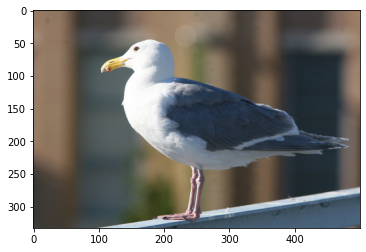

In [70]:
#testing imported data
print(data.images)
print(data.classes)
print(data.image_class_labels)
test_id = 3457
print(get_image_path(test_id))
print(get_image_class_name(test_id))
plt_img(get_image(test_id))


In [74]:
#get all images under each image category and check the image size and number of joints
def process_image_conformity():
    for img_id in data.images.image_id:
        #new_path = os.path.join(img_process,img)
        new_path = get_image_path(img_id,img_process)
        #check if already processed
        if not os.path.exists(new_path):
          if not os.path.exists(os.path.dirname(new_path)):
            os.makedirs(os.path.dirname(new_path))
          #cur_img = Image.open(os.path.join(img_fldr,img))
          cur_img = get_image(img_id,img_fldr)
          #picture needs resize?
          print('cur_img_id:',img_id,'img size：',cur_img.size,'img mode：',cur_img.mode)
          if cur_img.size[0]!=256 and cur_img.size[1]!=256: #should this be a or?
              cur_img=convertjpg(cur_img)
              print('cur_img_id:',img_id,'img size：',cur_img.size,'img mode：',cur_img.mode)
              #convert pic mode
              if(cur_img.mode!='RGB'):
                  cur_img=cur_img.convert('RGB')
                  print('cur_img_id:',img_id,'img size：',cur_img.size,'img mode：',cur_img.mode)
          #save picture to a new path
          cur_img.save(new_path)

#Visualization picture
def plt_img(img):
    img=np.array(img)
    plt.imshow(img)
    plt.show()
    
#Convert the picture to a uniform size
def convertjpg(img,width=256,height=256):
    new_img=img.resize((width,height),Image.BILINEAR) 
    return new_img

    
process_image_conformity()
        

cur_img_id: 331 img size： (365, 243) img mode： RGB
cur_img_id: 331 img size： (256, 256) img mode： RGB


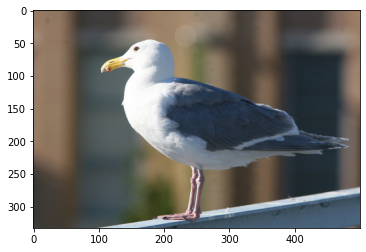

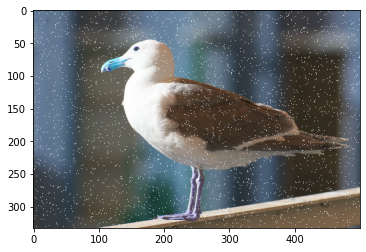

In [75]:
#Add random noise (actually, randomly change the gray value of pixels on the image to 255, which is white)
def random_noise(image,noise_num):
    img = cv2.imread(image)
    img_noise = img
    rows, cols, chn = img_noise.shape
    for i in range(noise_num):
        x = np.random.randint(0, rows)
        y = np.random.randint(0, cols)
        img_noise[x, y, :] = 255
    return img_noise

for img_id in data.images.image_id[3456:3457]:
    plt_img(get_image(img_id))
    img_noise=random_noise(get_image_path(img_id),3000)
    plt_img(img_noise)

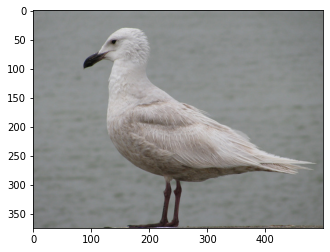

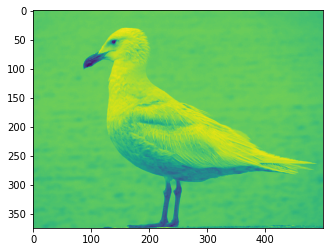

In [78]:
def gamma_transform(image):
    img = cv2.imread(image, 0)
    fi = img / 255.0
    gamma = 0.4
    out_img = np.power(fi, gamma)
    return out_img

for img_id in data.images.image_id[3474:3475]:
    plt_img(get_image(img_id))
    gamma_img=gamma_transform(get_image_path(img_id))
    plt_img(gamma_img)

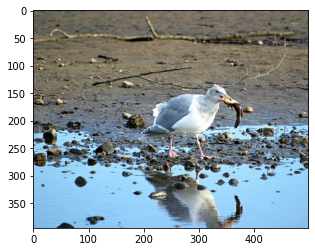

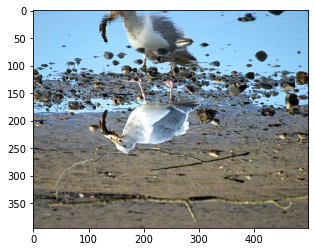

In [79]:
def pic_transpose(image):
    img = Image.open(image)
#     transpose_img = img.transpose(Image.ROTATE_90)
    transpose_img = img.transpose(Image.ROTATE_180)
    #transpose_img = img.transpose(Image.ROTATE_270)
    return transpose_img

for img_id in data.images.image_id[3437:3438]:
    plt_img(get_image(img_id))
    transpose_img=pic_transpose(get_image_path(img_id))
    plt_img(transpose_img)

In [32]:
def get_imghist(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img],[0],None,[256],[0,255])
    return hist

def cal_equalhist(img):
    img=cv2.imread(img)
    if len(img.shape) == 3:
         img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    h,w = img.shape[:2]
    grathist = get_imghist(img)
 
    zerosumMoment = np.zeros([256],np.uint32)
    for p in range(256):
        if p ==0:
            zerosumMoment[p] = grathist[0]
        else:
            zerosumMoment[p] = zerosumMoment[p-1] +grathist[p]
 
    output_q = np.zeros([256],np.uint8)
    cofficient = 256.0/(h*w)
    for p in range(256):
        q = cofficient *float(zerosumMoment[p]) - 1
        if q >= 0:
            output_q[p] = math.floor(q)
        else:
            output_q[p] = 0
 
    equalhistimage = np.zeros(img.shape,np.uint8)
    for i in range(h):
        for j in range(w):
            equalhistimage[i][j] = output_q[img[i][j]]
    return equalhistimage



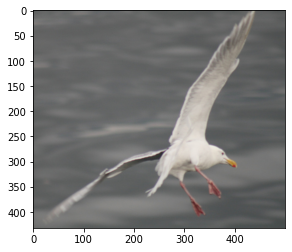

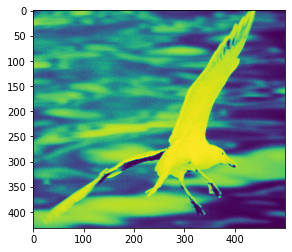

In [80]:
for img_id in data.images.image_id[3432:3433]:
    plt_img(get_image(img_id))
    transpose_img=cal_equalhist(get_image_path(img_id))
    plt_img(transpose_img)